# 데이터 불러오기 

In [49]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

def fetch_data_from_mysql(table_name):
    try:
        connection = mysql.connector.connect(
            host='5gears.iptime.org',
            user='root',
            password='andong1234',
            database='analysis'
        )

        if connection.is_connected():
            print("MySQL에 성공적으로 연결되었습니다.")
            cursor = connection.cursor()
            sql_query = f"SELECT * FROM {table_name};"
            cursor.execute(sql_query)
            records = cursor.fetchall()
            columns = [i[0] for i in cursor.description]
            df = pd.DataFrame(records, columns=columns)
            print(f"테이블 '{table_name}'에서 {cursor.rowcount}개의 행을 가져왔습니다.")
            return df

    except Error as e:
        print(f"MySQL에서 데이터를 가져오는 중 오류가 발생했습니다: {e}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL 연결이 닫혔습니다.")

dm_car = fetch_data_from_mysql("dm_car_market")
dm_ram = fetch_data_from_mysql("dm_ram_market")

MySQL에 성공적으로 연결되었습니다.
테이블 'dm_car_market'에서 26개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.
MySQL에 성공적으로 연결되었습니다.
테이블 'dm_ram_market'에서 23개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.


# 전처리

In [65]:
car_df = dm_car.drop(columns=['dm_id'])
car_df['record_month'] = pd.to_datetime(car_df['record_month'])
car_df.set_index('record_month', inplace=True)
car_df

,iron_price,aluminum_price,chrome_price,coal_price,car_price,posco_price,hyundai_steel_price,seah_steel_price,korea_steel_price,dongkuk_steel_price,daehan_steel_price,kg_steel_price,tcc_steel_price,kisco_price,hankuk_steel_price,exchange_rate,steel_news_score,raw_material_news_score
record_month,,,,,,,,,,,,,,,,,,
2023-01-01,122.36,2489.02,2.85,144.12,49494188.00,295450.00,33500.00,133325.00,19478.95,0.00,11240.50,7888.00,10116.00,16902.50,6389.00,1233.3000,-0.60,-0.70
2023-02-01,125.56,2417.28,2.78,134.01,51705444.00,316250.00,34972.50,140100.00,19715.10,0.00,13212.00,8849.00,11981.50,19264.50,6995.00,1323.0200,-0.50,-0.70
2023-03-01,126.45,2290.11,2.95,120.93,49642230.00,329886.36,34281.82,133045.45,19186.00,0.00,12312.27,9104.55,18835.45,20682.73,7265.00,1306.1100,-0.56,-0.71
2023-04-01,113.89,2341.00,2.95,119.04,51083636.00,392150.00,36047.50,138970.00,18619.80,0.00,13531.00,11182.50,37345.00,20967.50,7080.00,1337.7800,-0.53,-0.62
2023-05-01,104.40,2267.60,2.95,110.92,49177385.00,369200.00,35040.00,146595.00,17431.10,0.00,13546.00,9262.00,34315.00,20300.00,6737.00,1320.5600,-0.50,-0.49
2023-06-01,112.73,2181.07,2.73,91.93,47605534.00,388785.71,33845.24,146485.71,17435.86,12251.82,13234.29,9177.14,37980.95,18196.19,6464.76,1315.1100,-0.53,-0.69
2023-07-01,111.77,2152.38,2.56,89.00,45834059.00,494666.67,33959.52,153180.95,17411.71,9690.95,13014.29,8650.95,52921.43,17577.62,6256.19,1277.8600,-0.49,-0.61
2023-08-01,109.74,2134.16,2.30,87.76,47015039.00,577272.73,35170.45,146127.27,21820.95,11155.00,12765.91,8123.64,53606.82,18000.00,6019.09,1325.1400,-0.43,-0.61
2023-09-01,120.74,2177.50,2.18,89.68,48687692.00,568578.95,38868.42,140563.16,19247.05,11106.32,12965.79,8321.58,52523.68,18850.53,6050.00,1352.3100,-0.32,-0.43


In [51]:
ram_df = dm_ram.drop(columns=['dm_id'])
ram_df['record_month'] = pd.to_datetime(ram_df['record_month'])
ram_df.set_index('record_month', inplace=True)
ram_df

,silicon_price,SKHynix_DDR5_price,Samsung_DDR5_price,ESSENCORE_KLEVV_DDR5_price,TeamGroup_TCREATE_DDR5_price,Samsung_DDR4_price,ESSENCORE_KLEVV_DDR4_price,Micron_Crucial_DDR4_price,exchange_rate,ram_news_score,raw_material_news_score
record_month,,,,,,,,,,,
2023-04-01,2281.25,87750.00,68090.00,78990.00,72380.00,44879.00,41780.00,44590.00,1337.7800,-0.39,-0.62
2023-05-01,2105.40,83360.00,49580.00,63500.00,61450.00,42550.00,37690.00,44900.00,1320.5600,-0.61,-0.49
2023-06-01,1883.00,82010.00,45150.00,64480.00,58990.00,37570.00,35650.00,41000.00,1315.1100,-0.61,-0.69
2023-07-01,1870.20,80330.00,43520.00,59660.00,57000.00,34540.00,33100.00,37500.00,1277.8600,-0.63,-0.61
2023-08-01,1884.50,79850.00,43060.00,56010.00,54872.00,33830.00,33100.00,36300.00,1325.1400,-0.55,-0.61
2023-09-01,2014.50,79560.00,46100.00,55380.00,54872.00,36240.00,29900.00,36310.00,1352.3100,-0.75,-0.43
2023-10-01,2049.00,78150.00,53600.00,57690.00,54872.00,40400.00,35790.00,38140.00,1352.1500,-0.61,-0.50
2023-11-01,2009.00,78500.00,50830.00,60840.00,56730.00,38055.00,38000.00,43380.00,1299.3500,-0.73,-0.53
2023-12-01,2077.50,68590.00,51890.00,62230.00,56738.00,40460.00,38500.00,40500.00,1294.4000,-0.82,-0.54


In [66]:
def convert_to_numeric(df):
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

convert_to_numeric(car_df)
convert_to_numeric(ram_df)

# 상관관계 

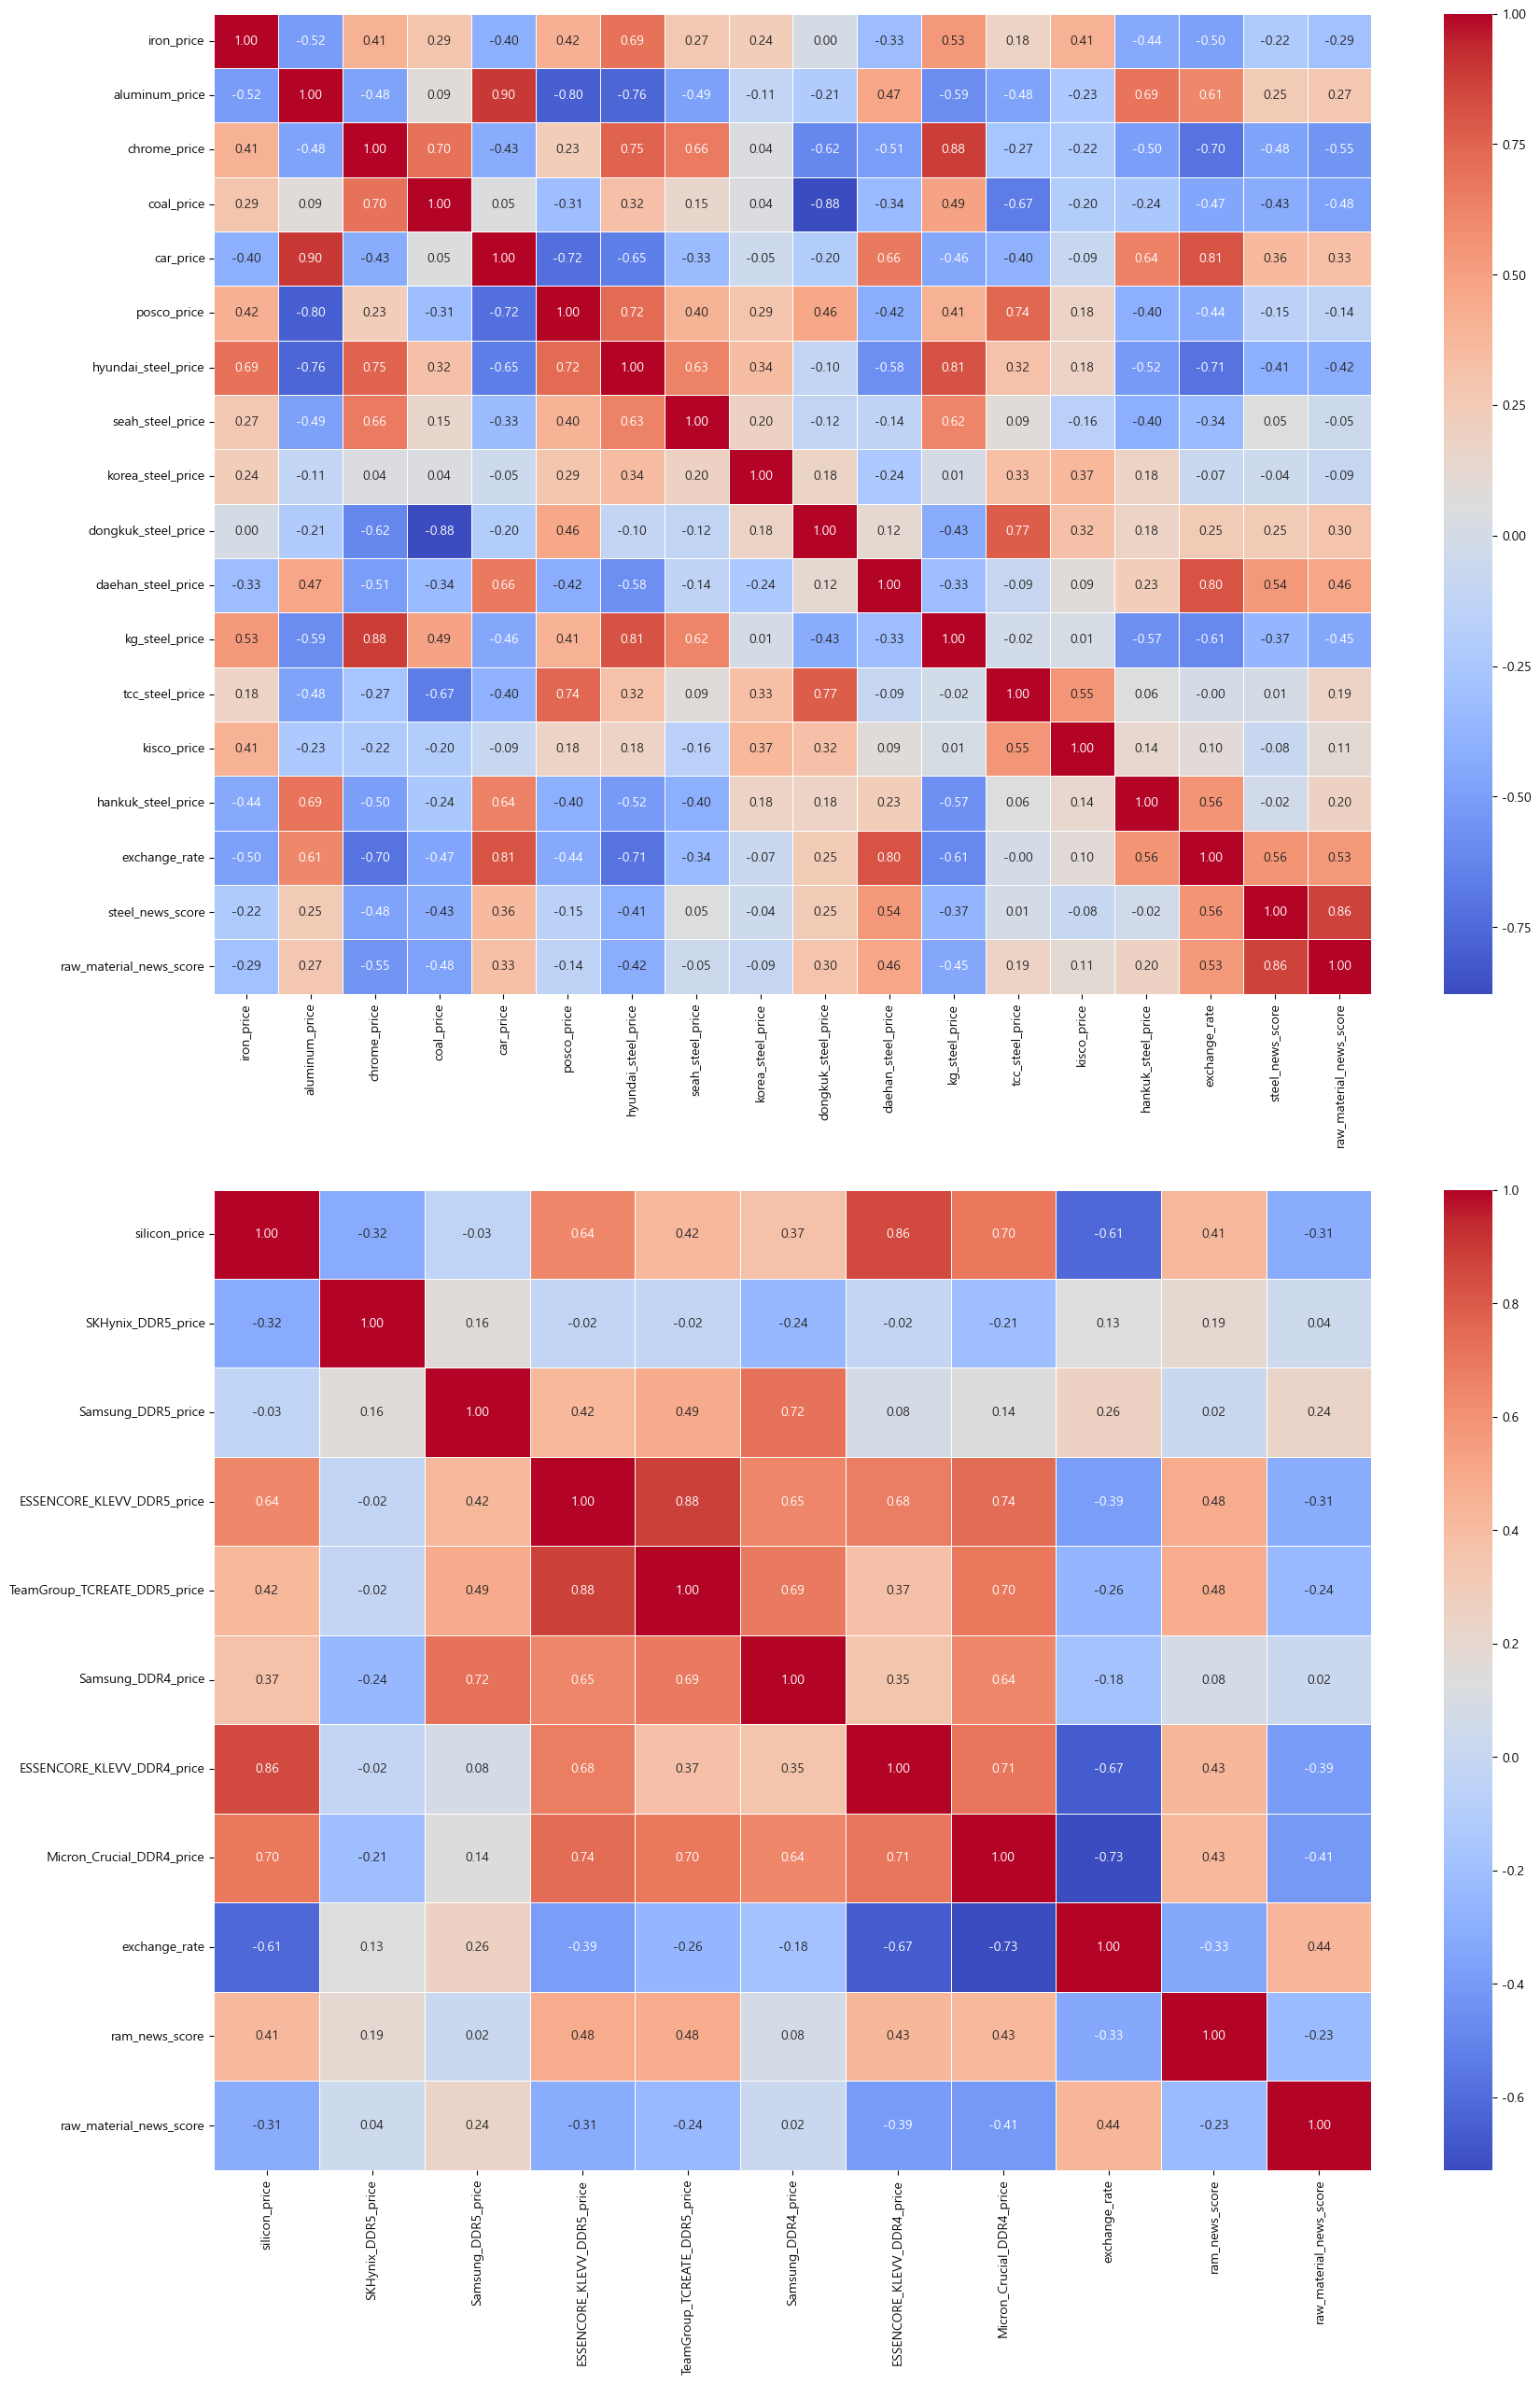

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

plt.figure(figsize=(20, 30))
plt.subplot(2, 1, 1) 
sns.heatmap(car_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.subplot(2, 1, 2) 
sns.heatmap(ram_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# 결측치 처리 

In [67]:
car_df = car_df.mask((car_df >= -0.1) & (car_df <= 0.1))
ram_df = ram_df.mask((ram_df >= -0.1) & (ram_df <= 0.1))

In [68]:
car_df = car_df.apply(lambda col: col.fillna(col.mean()))
ram_df = ram_df.apply(lambda col: col.fillna(col.mean()))

In [69]:
car_df

,iron_price,aluminum_price,chrome_price,coal_price,car_price,posco_price,hyundai_steel_price,seah_steel_price,korea_steel_price,dongkuk_steel_price,daehan_steel_price,kg_steel_price,tcc_steel_price,kisco_price,hankuk_steel_price,exchange_rate,steel_news_score,raw_material_news_score
record_month,,,,,,,,,,,,,,,,,,
2023-01-01,122.36,2489.02,2.85,144.12,49494188.0,295450.00,33500.00,133325.00,19478.95,10155.679048,11240.50,7888.00,10116.00,16902.50,6389.00,1233.30,-0.6000,-0.7000
2023-02-01,125.56,2417.28,2.78,134.01,51705444.0,316250.00,34972.50,140100.00,19715.10,10155.679048,13212.00,8849.00,11981.50,19264.50,6995.00,1323.02,-0.5000,-0.7000
2023-03-01,126.45,2290.11,2.95,120.93,49642230.0,329886.36,34281.82,133045.45,19186.00,10155.679048,12312.27,9104.55,18835.45,20682.73,7265.00,1306.11,-0.5600,-0.7100
2023-04-01,113.89,2341.00,2.95,119.04,51083636.0,392150.00,36047.50,138970.00,18619.80,10155.679048,13531.00,11182.50,37345.00,20967.50,7080.00,1337.78,-0.5300,-0.6200
2023-05-01,104.40,2267.60,2.95,110.92,49177385.0,369200.00,35040.00,146595.00,17431.10,10155.679048,13546.00,9262.00,34315.00,20300.00,6737.00,1320.56,-0.5000,-0.4900
2023-06-01,112.73,2181.07,2.73,91.93,47605534.0,388785.71,33845.24,146485.71,17435.86,12251.820000,13234.29,9177.14,37980.95,18196.19,6464.76,1315.11,-0.5300,-0.6900
2023-07-01,111.77,2152.38,2.56,89.00,45834059.0,494666.67,33959.52,153180.95,17411.71,9690.950000,13014.29,8650.95,52921.43,17577.62,6256.19,1277.86,-0.4900,-0.6100
2023-08-01,109.74,2134.16,2.30,87.76,47015039.0,577272.73,35170.45,146127.27,21820.95,11155.000000,12765.91,8123.64,53606.82,18000.00,6019.09,1325.14,-0.4300,-0.6100
2023-09-01,120.74,2177.50,2.18,89.68,48687692.0,568578.95,38868.42,140563.16,19247.05,11106.320000,12965.79,8321.58,52523.68,18850.53,6050.00,1352.31,-0.3200,-0.4300


In [93]:
ram_df

,silicon_price,SKHynix_DDR5_price,Samsung_DDR5_price,ESSENCORE_KLEVV_DDR5_price,TeamGroup_TCREATE_DDR5_price,Samsung_DDR4_price,ESSENCORE_KLEVV_DDR4_price,Micron_Crucial_DDR4_price,exchange_rate,ram_news_score,raw_material_news_score
record_month,,,,,,,,,,,
2023-04-01,2281.25,87750.0,68090.0,78990.0,72380.0,44879.0,41780.0,44590.0,1337.78,-0.39,-0.620000
2023-05-01,2105.40,83360.0,49580.0,63500.0,61450.0,42550.0,37690.0,44900.0,1320.56,-0.61,-0.490000
2023-06-01,1883.00,82010.0,45150.0,64480.0,58990.0,37570.0,35650.0,41000.0,1315.11,-0.61,-0.690000
2023-07-01,1870.20,80330.0,43520.0,59660.0,57000.0,34540.0,33100.0,37500.0,1277.86,-0.63,-0.610000
2023-08-01,1884.50,79850.0,43060.0,56010.0,54872.0,33830.0,33100.0,36300.0,1325.14,-0.55,-0.610000
2023-09-01,2014.50,79560.0,46100.0,55380.0,54872.0,36240.0,29900.0,36310.0,1352.31,-0.75,-0.430000
2023-10-01,2049.00,78150.0,53600.0,57690.0,54872.0,40400.0,35790.0,38140.0,1352.15,-0.61,-0.500000
2023-11-01,2009.00,78500.0,50830.0,60840.0,56730.0,38055.0,38000.0,43380.0,1299.35,-0.73,-0.530000
2023-12-01,2077.50,68590.0,51890.0,62230.0,56738.0,40460.0,38500.0,40500.0,1294.40,-0.82,-0.540000


# car 모델 평가

In [79]:
# 학습 데이터와 테스트 데이터 분리
train_data = car_df.iloc[:-1]  # 마지막 한 달 제외
test_data = car_df.iloc[-1:]   # 마지막 한 달

In [83]:
from statsmodels.tsa.api import VAR

# VAR 모델 학습
model = VAR(train_data)
model_fitted = model.fit(maxlags=15)

# 테스트 데이터 예측 (마지막 한 달)
forecast = model_fitted.forecast(y=train_data.values[-model_fitted.k_ar:], steps=1)
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

print("예측 결과:")
forecast_df

예측 결과:


c:\Users\gh159\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,iron_price,aluminum_price,chrome_price,coal_price,car_price,posco_price,hyundai_steel_price,seah_steel_price,korea_steel_price,dongkuk_steel_price,daehan_steel_price,kg_steel_price,tcc_steel_price,kisco_price,hankuk_steel_price,exchange_rate,steel_news_score,raw_material_news_score
record_month,,,,,,,,,,,,,,,,,,
2025-02-01,94.109931,2519.647683,1.586053,91.417434,5.126141e+07,284928.387765,22395.919728,125541.176171,18447.161055,8264.819046,14399.089463,5864.268327,33326.911248,17712.511652,7509.248518,1396.905844,-0.340037,-0.444552


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 평가 지표 계산
mae = mean_absolute_error(test_data.values.flatten(), forecast_df.values.flatten())
rmse = np.sqrt(mean_squared_error(test_data.values.flatten(), forecast_df.values.flatten()))
mape = np.mean(np.abs((test_data.values.flatten() - forecast_df.values.flatten()) / test_data.values.flatten())) * 100
r2 = r2_score(test_data.values.flatten(), forecast_df.values.flatten())

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R-squared: {r2}")

MAE: 186443.19819348704
RMSE: 774280.171264636
MAPE: 9.159289487085163%
R-squared: 0.9961555804346827


# car VAR (Vector AutoRegressive model)

In [89]:
# 데이터 차분 (첫 번째 차분)
df_diff = car_df.diff().dropna()

In [90]:
from statsmodels.tsa.api import VAR

# VAR 모델 생성
model = VAR(df_diff)

# 모델 학습 (최대 시차 선택)
model_fitted = model.fit(maxlags=15)  # 최대 시차를 설정하거나 자동으로 선택

# 최적의 시차 확인
print("최적의 시차:", model_fitted.k_ar)


최적의 시차: 15


c:\Users\gh159\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
# 마지막 k_ar 관측치를 기반으로 예측
forecast = model_fitted.forecast(y=df_diff.values[-model_fitted.k_ar:], steps=1)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, index=[car_df.index[-1] + pd.DateOffset(months=1)], columns=car_df.columns)

# 차분 복원 (원래 값으로 변환)
forecast_restored = forecast_df + car_df.iloc[-1]

print("예측 결과:")
forecast_restored


예측 결과:


,iron_price,aluminum_price,chrome_price,coal_price,car_price,posco_price,hyundai_steel_price,seah_steel_price,korea_steel_price,dongkuk_steel_price,daehan_steel_price,kg_steel_price,tcc_steel_price,kisco_price,hankuk_steel_price,exchange_rate,steel_news_score,raw_material_news_score
2025-03-01,99.194787,2554.23439,1.553999,84.808788,5.158075e+07,273296.721493,21384.708383,141352.707962,16592.388696,7627.557881,15267.734799,6374.915027,23945.616253,17718.656339,7612.02503,1380.997422,-0.369386,-0.259124


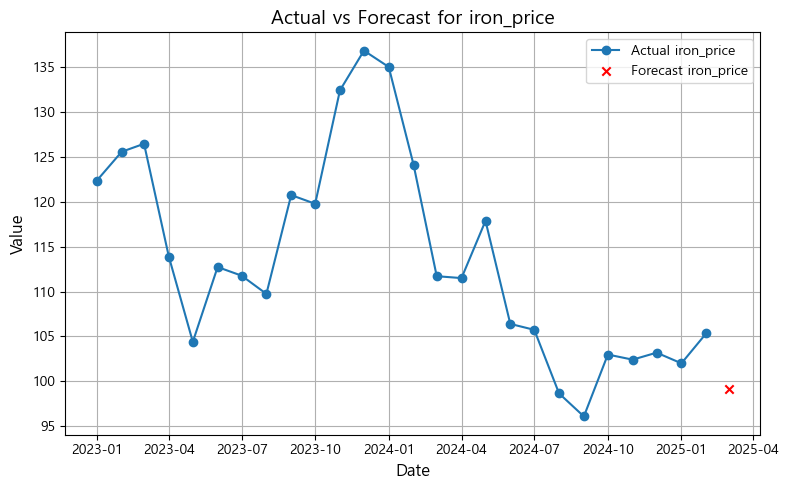

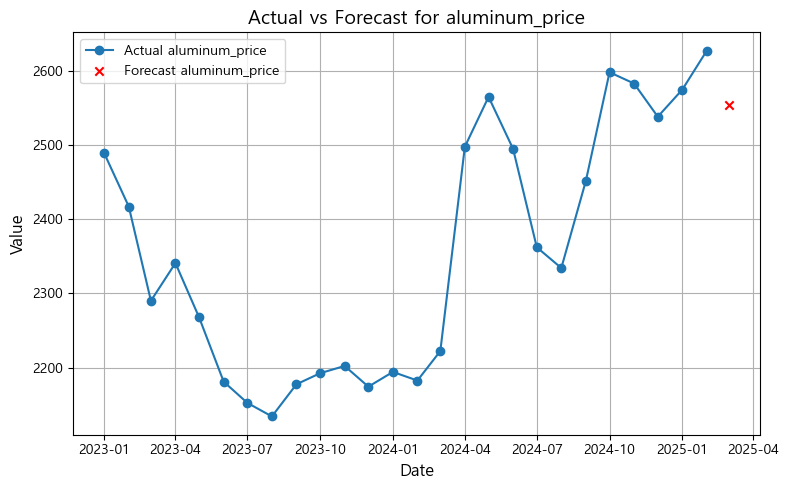

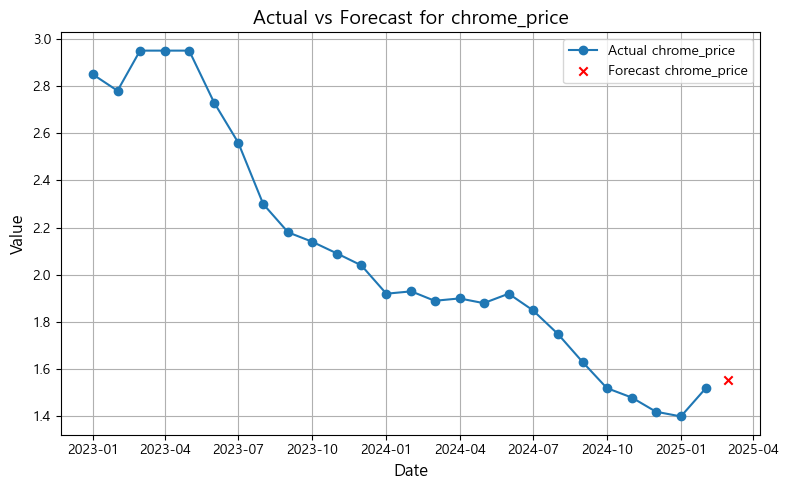

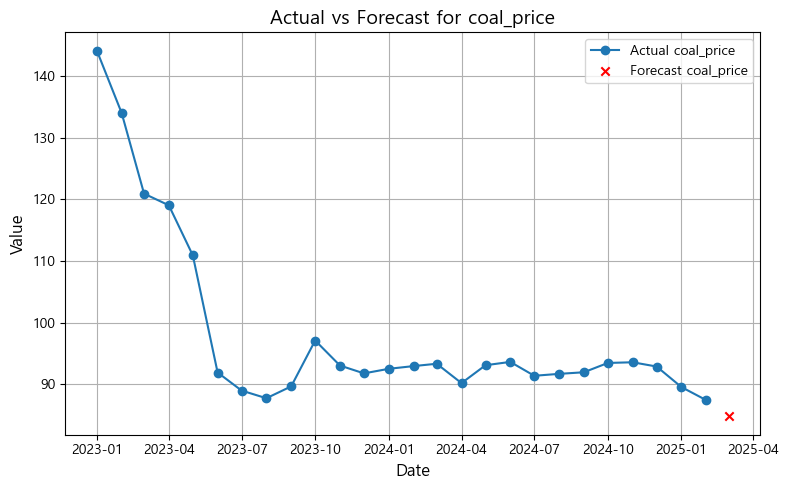

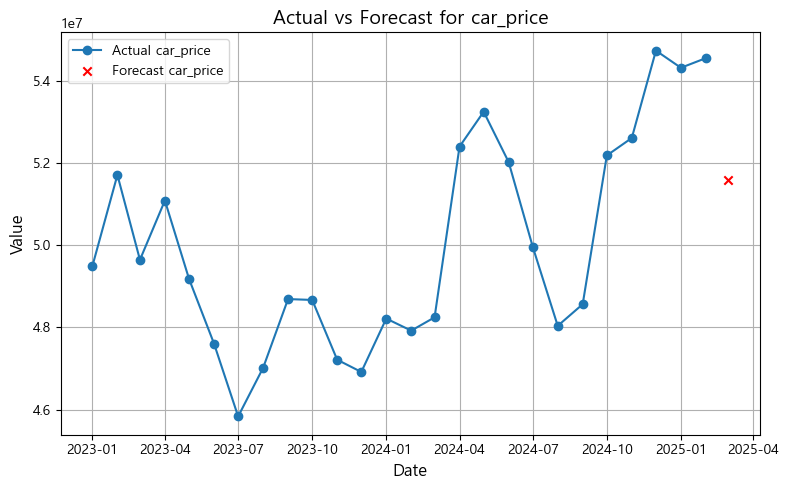

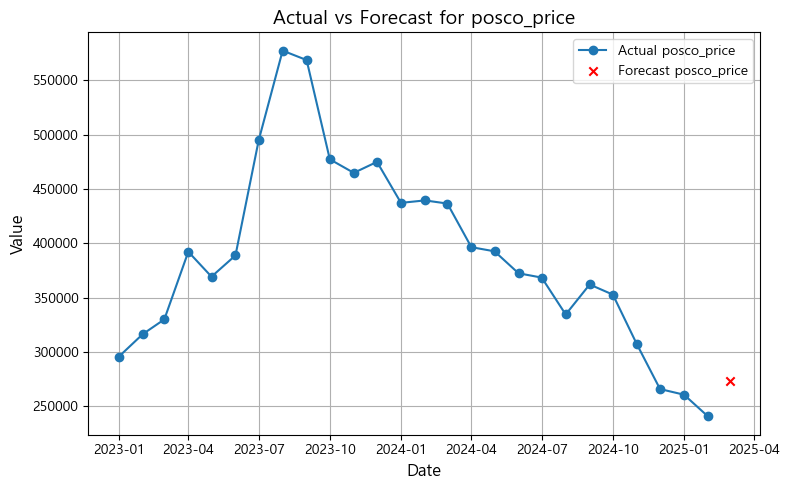

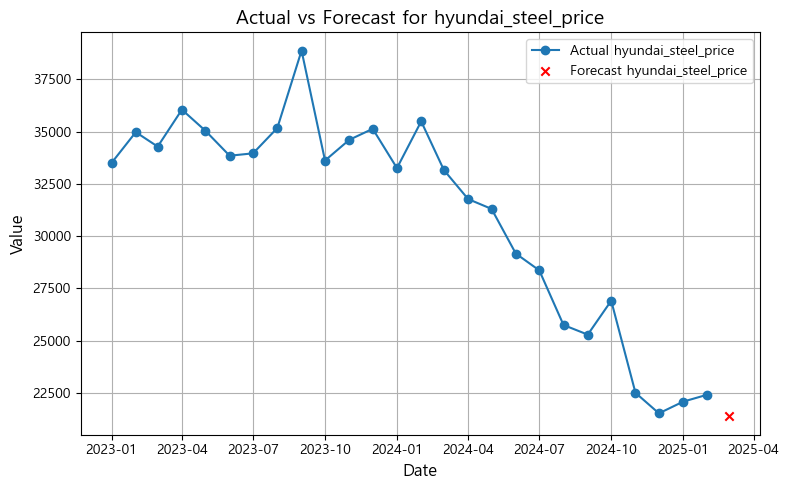

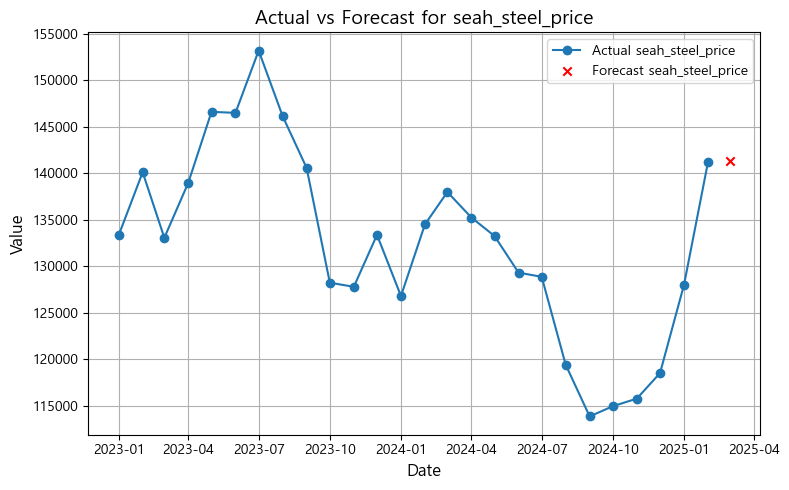

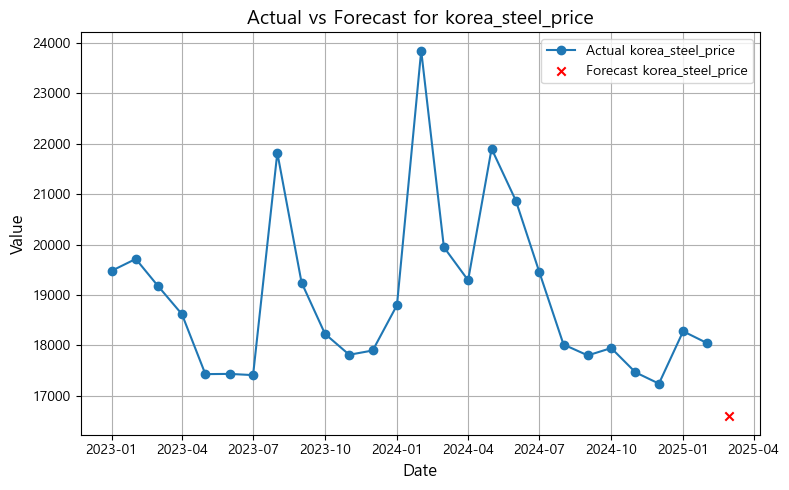

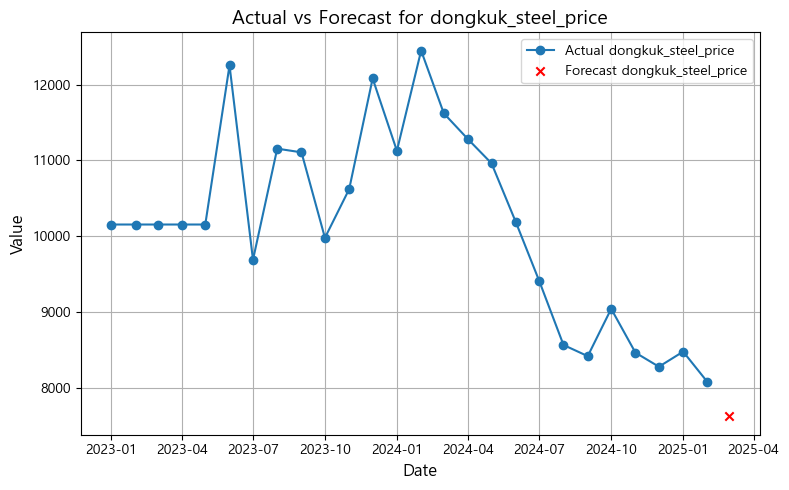

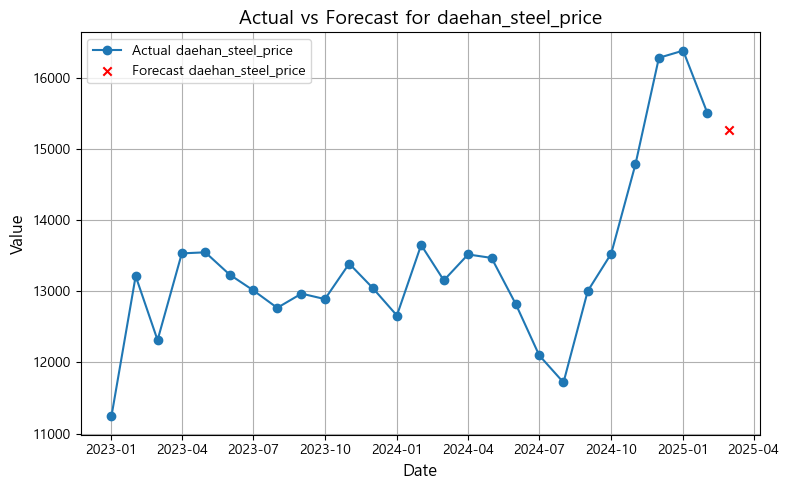

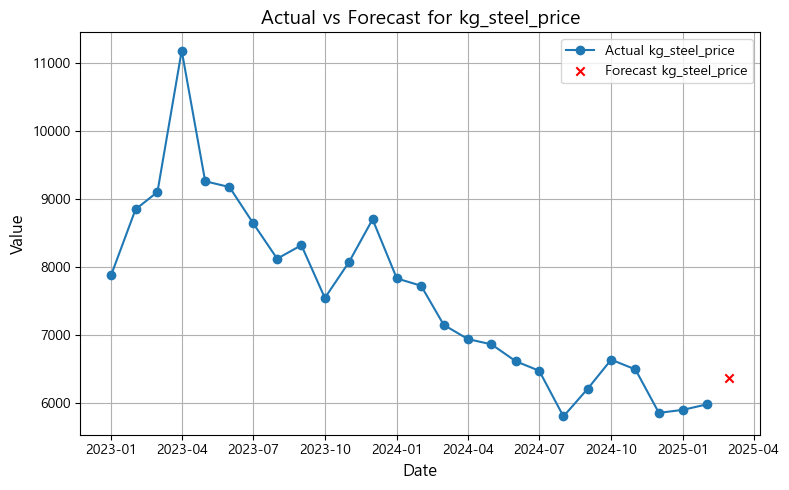

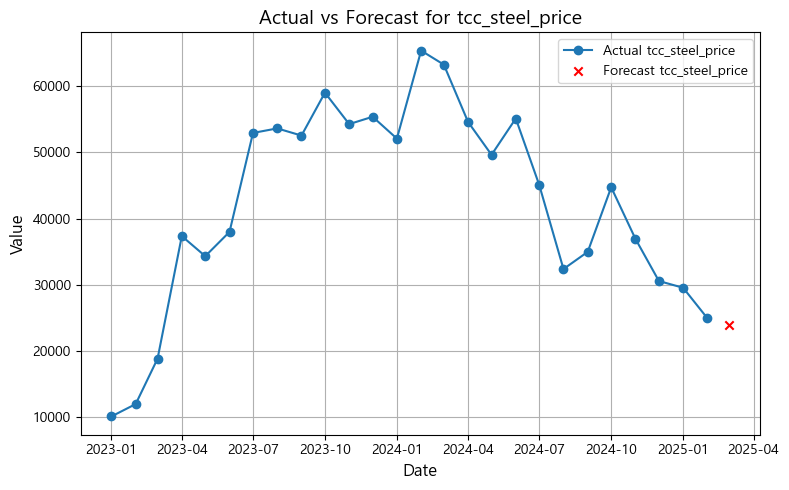

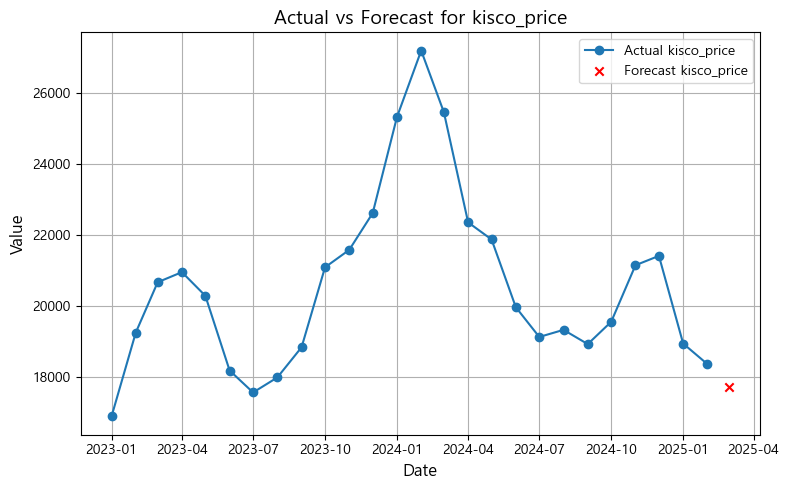

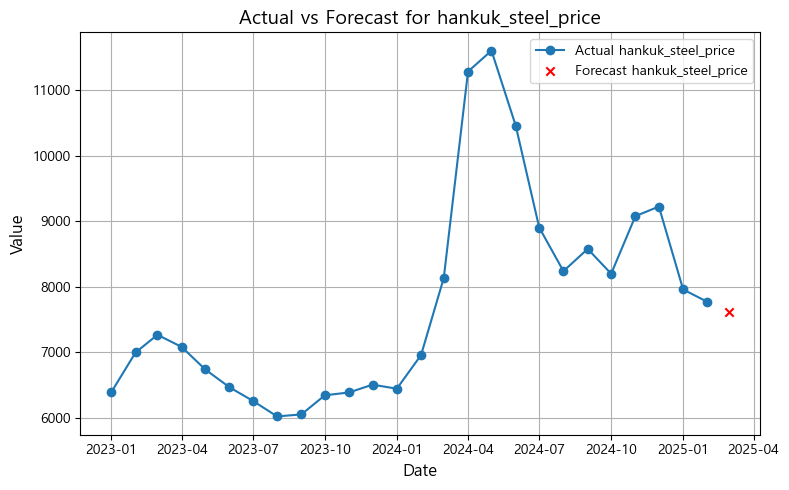

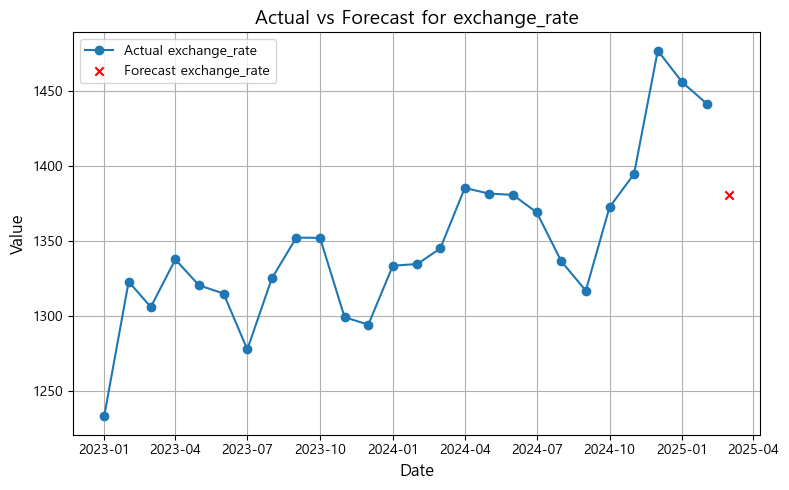

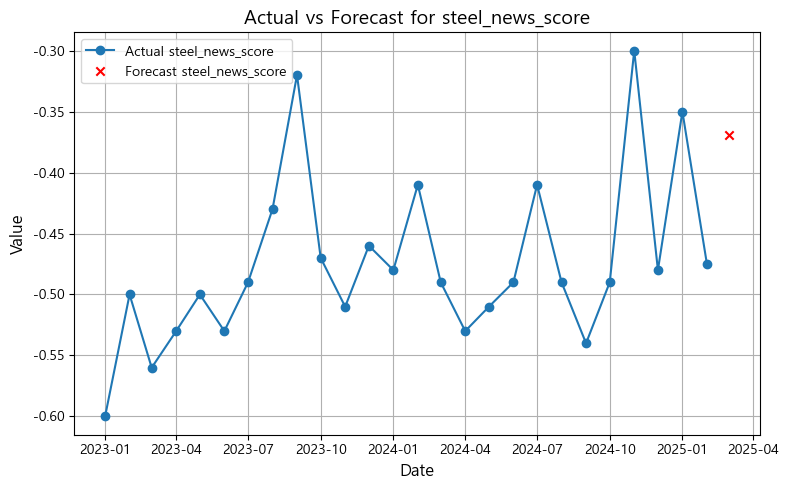

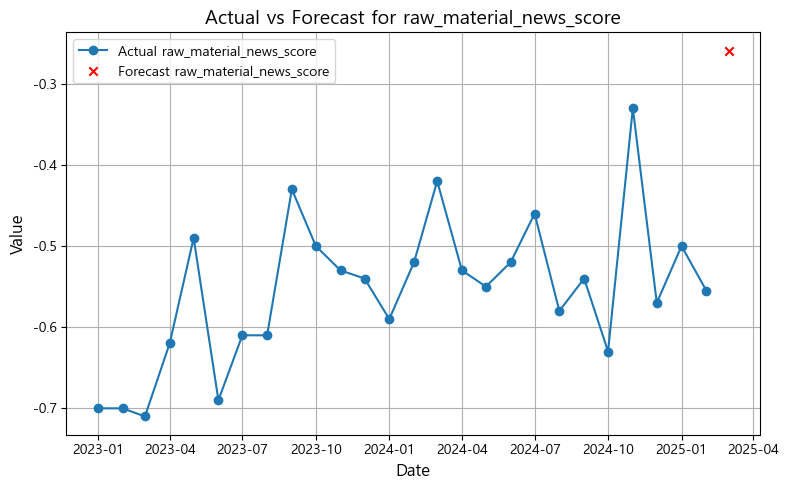

In [92]:
import matplotlib.pyplot as plt

# 컬럼별로 개별 플롯 생성
for column in car_df.columns:
    plt.figure(figsize=(8, 5))
    
    # 실제 값 플롯
    plt.plot(car_df.index, car_df[column], label=f"Actual {column}", marker='o')
    
    # 예측 값 플롯
    plt.scatter(forecast_restored.index, forecast_restored[column], label=f"Forecast {column}", color='red', marker='x')
    
    # 그래프 설정
    plt.title(f"Actual vs Forecast for {column}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()


# ram 모델 평가 

In [94]:
# 학습 데이터와 테스트 데이터 분리
train_data = ram_df.iloc[:-1]  # 마지막 한 달 제외
test_data = ram_df.iloc[-1:]   # 마지막 한 달

In [95]:
from statsmodels.tsa.api import VAR

# VAR 모델 학습
model = VAR(train_data)
model_fitted = model.fit(maxlags=15)

# 테스트 데이터 예측 (마지막 한 달)
forecast = model_fitted.forecast(y=train_data.values[-model_fitted.k_ar:], steps=1)
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

print("예측 결과:")
forecast_df

예측 결과:


c:\Users\gh159\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,silicon_price,SKHynix_DDR5_price,Samsung_DDR5_price,ESSENCORE_KLEVV_DDR5_price,TeamGroup_TCREATE_DDR5_price,Samsung_DDR4_price,ESSENCORE_KLEVV_DDR4_price,Micron_Crucial_DDR4_price,exchange_rate,ram_news_score,raw_material_news_score
record_month,,,,,,,,,,,
2025-02-01,1553.9124,82297.908835,57668.851634,56248.300339,54801.44711,40305.097863,27901.352479,32614.384234,1429.177046,-0.831143,-0.419845


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 평가 지표 계산
mae = mean_absolute_error(test_data.values.flatten(), forecast_df.values.flatten())
rmse = np.sqrt(mean_squared_error(test_data.values.flatten(), forecast_df.values.flatten()))
mape = np.mean(np.abs((test_data.values.flatten() - forecast_df.values.flatten()) / test_data.values.flatten())) * 100
r2 = r2_score(test_data.values.flatten(), forecast_df.values.flatten())

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R-squared: {r2}")

MAE: 725.9193412171294
RMSE: 1325.15330061354
MAPE: 3.5131745344963536%
R-squared: 0.9977430183512283


# ram VAR (Vector AutoRegressive model)

In [97]:
# 데이터 차분 (첫 번째 차분)
df_diff = ram_df.diff().dropna()

In [98]:
from statsmodels.tsa.api import VAR

# VAR 모델 생성
model = VAR(df_diff)

# 모델 학습 (최대 시차 선택)
model_fitted = model.fit(maxlags=15)  # 최대 시차를 설정하거나 자동으로 선택

# 최적의 시차 확인
print("최적의 시차:", model_fitted.k_ar)

최적의 시차: 15


c:\Users\gh159\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
# 마지막 k_ar 관측치를 기반으로 예측
forecast = model_fitted.forecast(y=df_diff.values[-model_fitted.k_ar:], steps=1)

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame(forecast, index=[ram_df.index[-1] + pd.DateOffset(months=1)], columns=ram_df.columns)

# 차분 복원 (원래 값으로 변환)
forecast_restored = forecast_df + ram_df.iloc[-1]

print("예측 결과:")
forecast_restored

예측 결과:


,silicon_price,SKHynix_DDR5_price,Samsung_DDR5_price,ESSENCORE_KLEVV_DDR5_price,TeamGroup_TCREATE_DDR5_price,Samsung_DDR4_price,ESSENCORE_KLEVV_DDR4_price,Micron_Crucial_DDR4_price,exchange_rate,ram_news_score,raw_material_news_score
2025-03-01,1559.564999,83523.061217,61320.530941,55963.395223,54508.057819,38897.91291,27808.301035,32132.166509,1442.037155,-0.82749,-0.564476


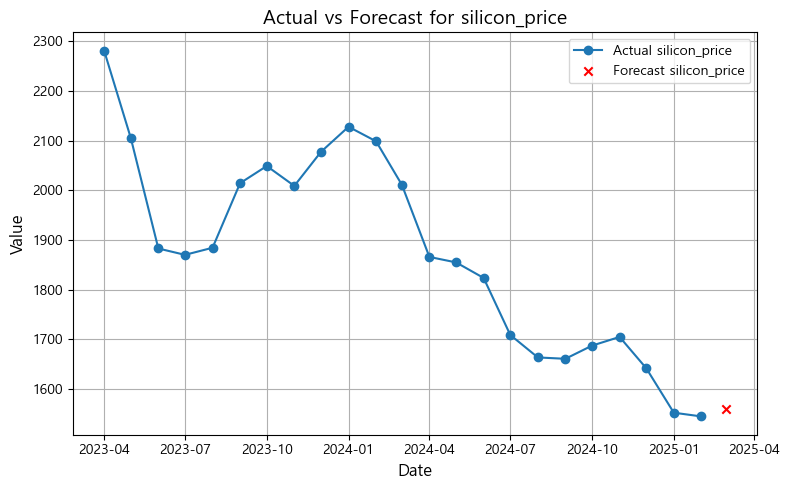

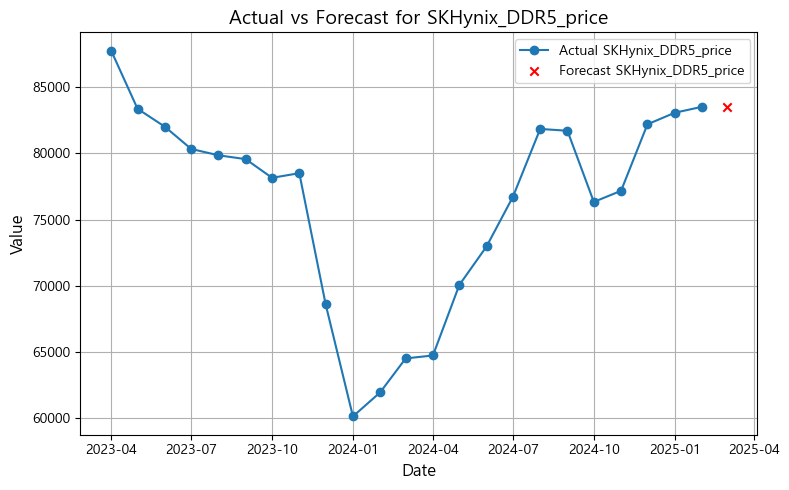

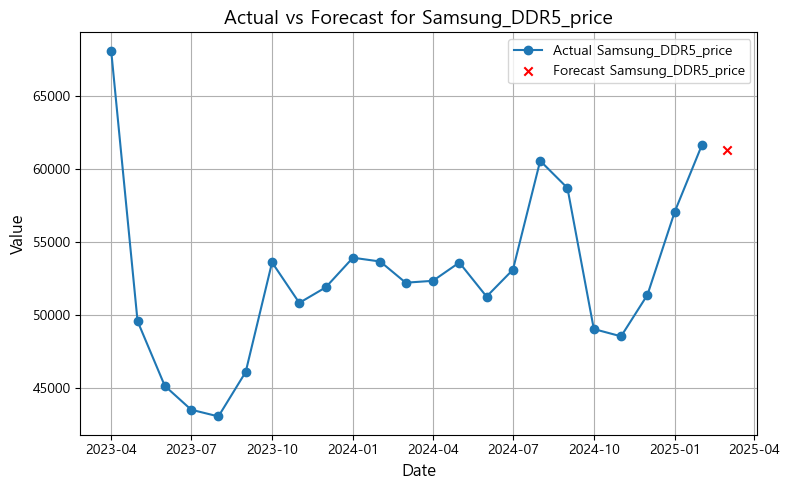

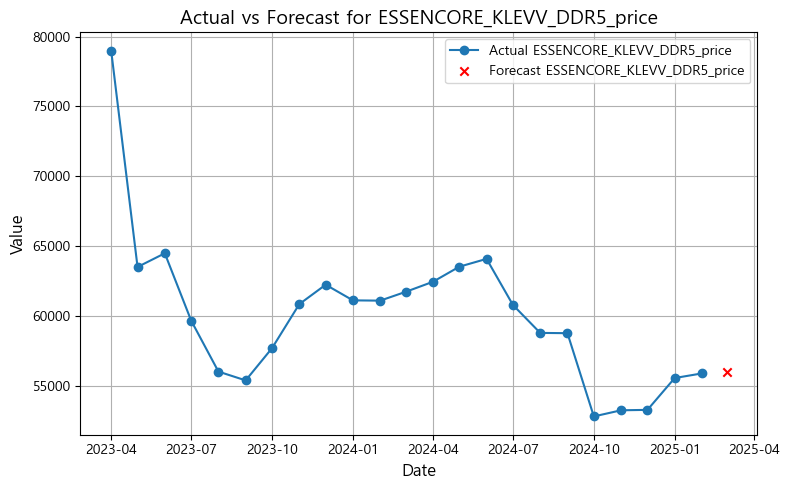

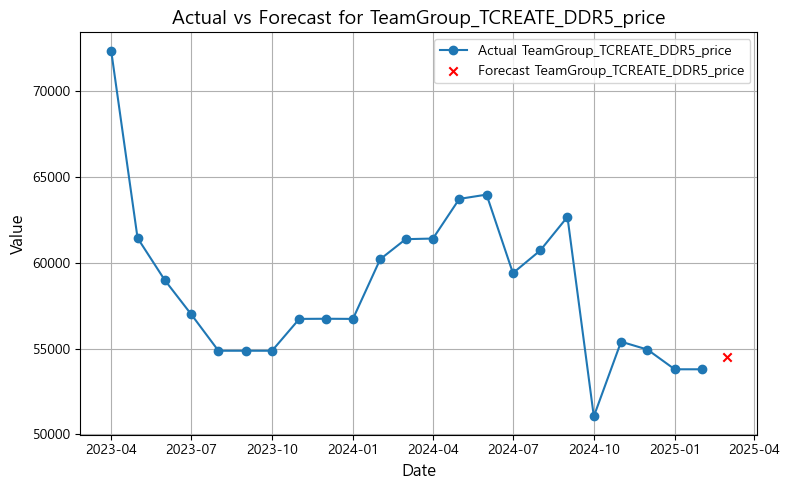

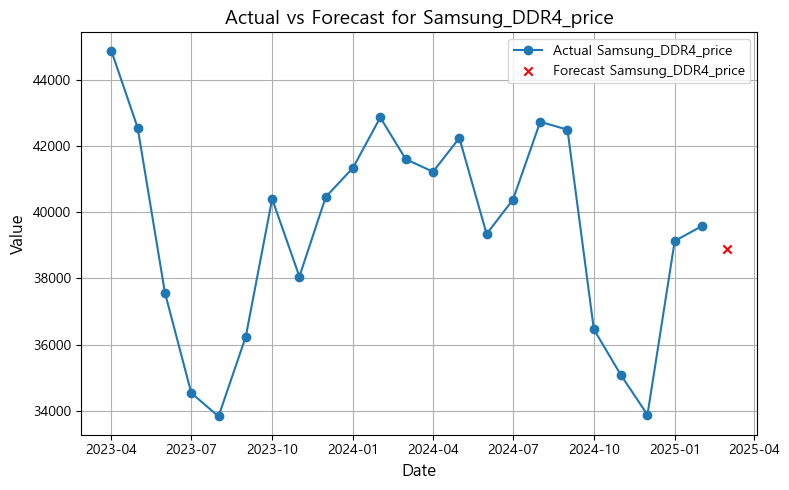

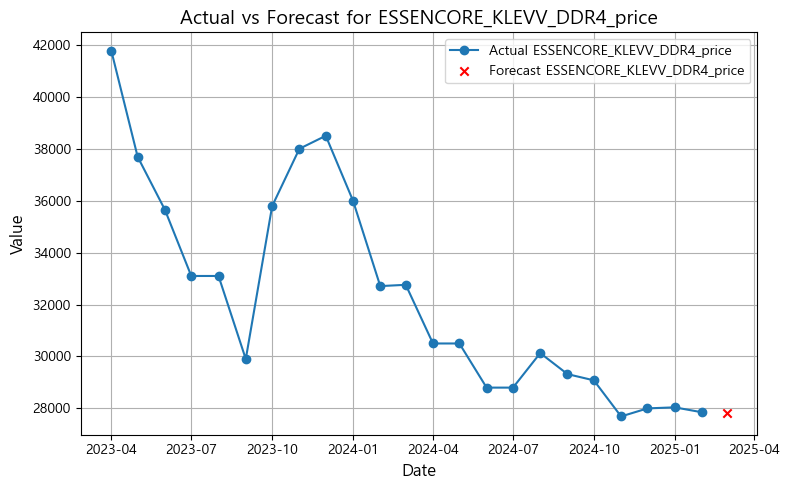

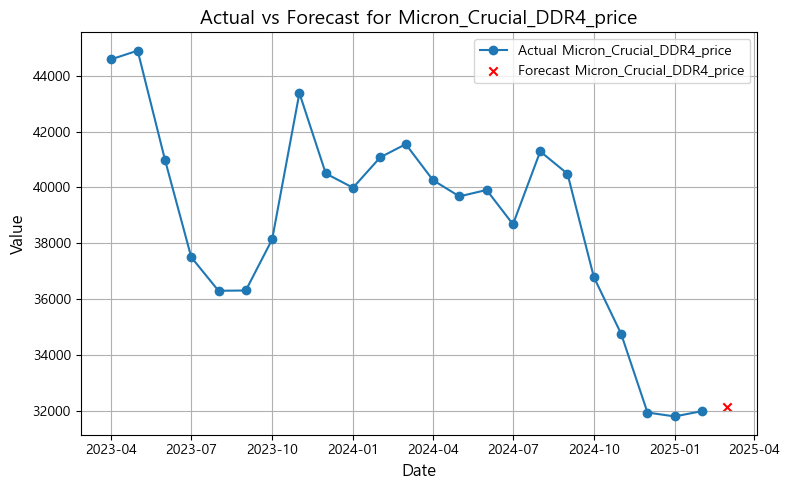

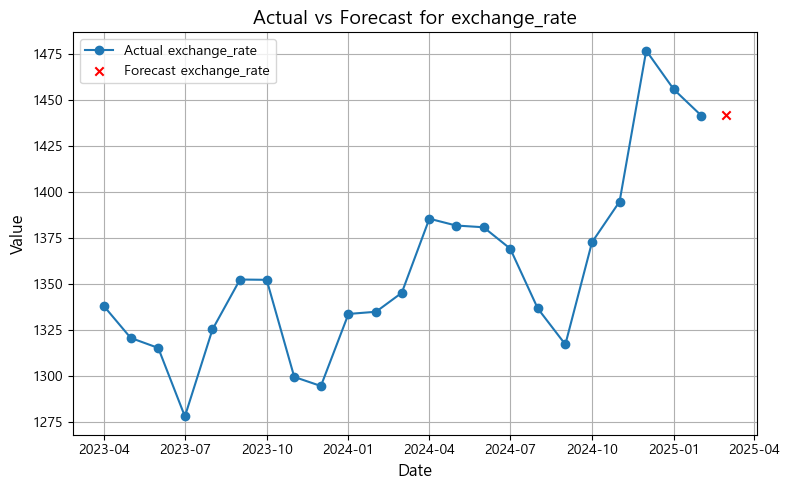

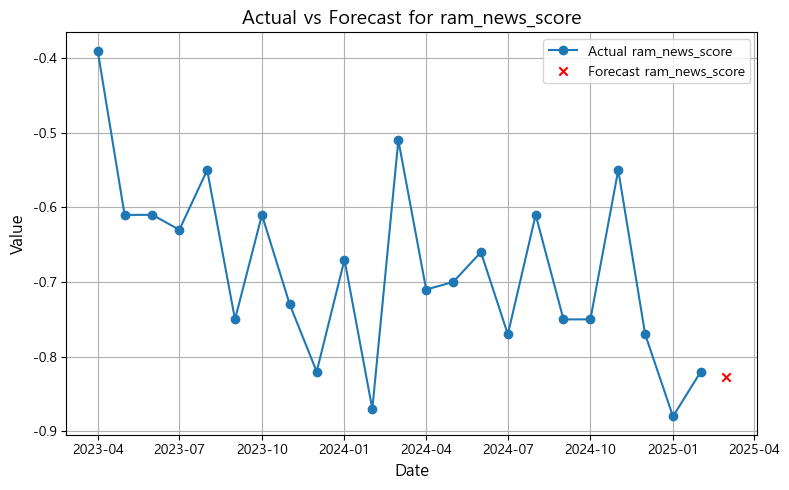

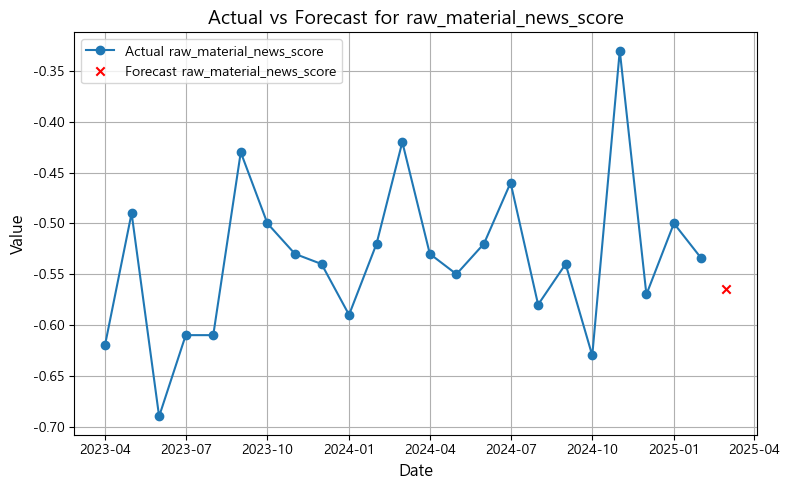

In [100]:
import matplotlib.pyplot as plt

# 컬럼별로 개별 플롯 생성
for column in ram_df.columns:
    plt.figure(figsize=(8, 5))
    
    # 실제 값 플롯
    plt.plot(ram_df.index, ram_df[column], label=f"Actual {column}", marker='o')
    
    # 예측 값 플롯
    plt.scatter(forecast_restored.index, forecast_restored[column], label=f"Forecast {column}", color='red', marker='x')
    
    # 그래프 설정
    plt.title(f"Actual vs Forecast for {column}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()